<a href="https://colab.research.google.com/github/victoregomezf-maker/seminario/blob/main/regresion_lineal_15_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

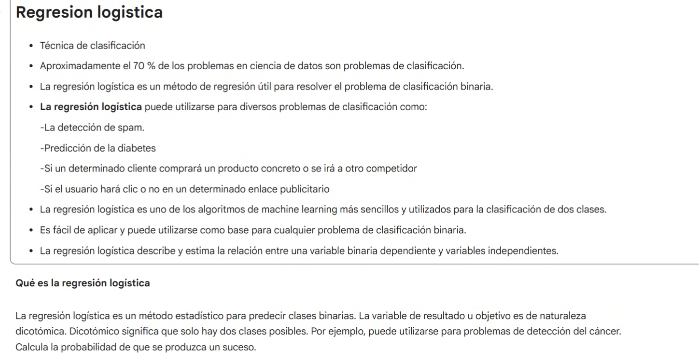

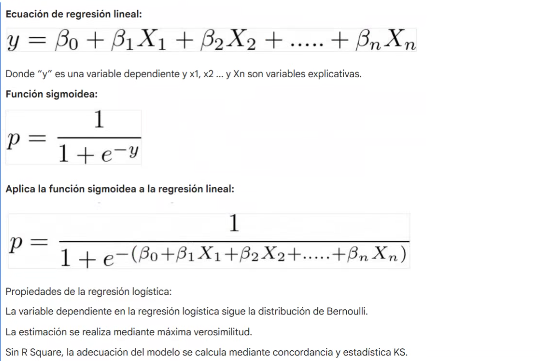

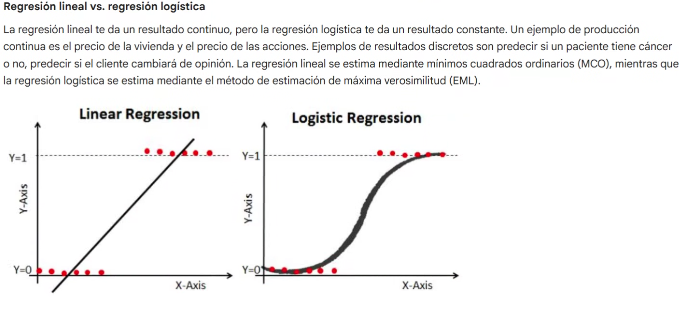

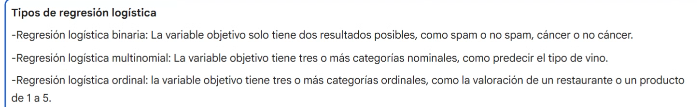

In [ ]:
#imprtar pandas
import pandas as pd

In [ ]:
RLG =pd.read_csv('diabetes.csv')

In [ ]:
RLG.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThinckness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
# load dataset, pandas will correctly identify the header row by default
RLG = pd.read_csv("diabetes.csv")
# Rename 'SkinThickness' column to 'SkinThinckness' to match the col_names list and feature_cols later used
RLG.rename(columns={'SkinThickness': 'SkinThinckness'}, inplace=True)

#**seleccionar caracteristicas**

In [ ]:
#dividir el conjunto de datos en características y variable objetivo
#Aqui vamos a dividir las columnas dadas en dos tipos de variables: dependiente o (variable objetivo) e independientes o (variables características)
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThinckness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = RLG[feature_cols] # Features
y = RLG.Outcome # Target variable


#**Dividir los datos**

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# **Desarrollo y prediccion de modelos**

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

In [ ]:
# instancia el modelo (utilizando los parámetros predeterminados)
logreg = LogisticRegression(random_state=16)

# Ajustar el modelo con los datos
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Importar la clase de metricas
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 26,  41]])

# **VISUALIZACION DE LA MATRIZ DE CONFUSION MEDIANTE UN MAPA DE CALOR**

In [ ]:
#importar librerias
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 427.9555555555555, 'Predicted label')

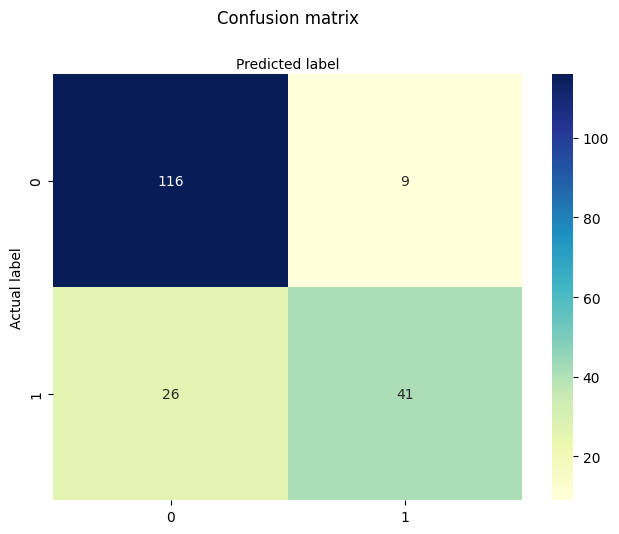

In [ ]:
nombre_clase=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(nombre_clase))
plt.xticks(tick_marks, nombre_clase)
plt.yticks(tick_marks, nombre_clase)

#Crear el mapa de calor
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **METRICAS DE EVALUACION DE LA MATRIZ DE CONFUSION**

In [ ]:
from sklearn.metrics import classification_report
target_names = ['sin diabetes', 'con diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

sin diabetes       0.82      0.93      0.87       125
con diabetes       0.82      0.61      0.70        67

    accuracy                           0.82       192
   macro avg       0.82      0.77      0.78       192
weighted avg       0.82      0.82      0.81       192



# **Curva ROC (caracteristica operativa del receptor)**

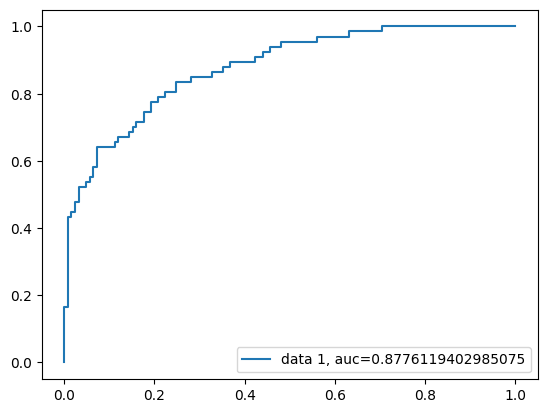

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()